

# Quantum Gate and Simulator
Previously we understand how to Represent Qunatum gate  using bloch sphere. now this notebook demonstrate how to 
bulid quantum gate and simulates its result on Simulator.

**Learning Objective** -
- Understand how basic gate modify qubit state
- Visualize the effect of X,Y,Z and H Gate.
- Learn Qubit flipping and phase introduction concept
- create Custom gate using unitary matrix
- Run all circuit using **AerSimulator**
- Interprete Measurement outcome

## 1.Import required Libraries
first import required libraries.AerSimulator to run circuit on simulator.Operator built-in library for quantum gate operation include predefine Quanutm gate.

In [1]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit
#%matplotlib inline
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator
import numpy as np
import matplotlib.pyplot as plt

## 2.Pauli- X Gate

- **Definition:**
The **Pauli X-Gate** is used to flip the qubit.
$$
X = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
$$
- **Intuition:**
    - Equivalant to the classical NOT operation
    - Turn qubit state, |0> --> |1> and |1> --> |0>

- **Expected Result:**
Since the qubit start  in |0>  ,applying X will flip into |1>.


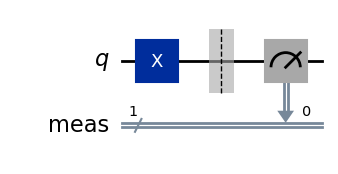

In [2]:
qc_x = QuantumCircuit(1)
qc_x.x(0)
qc_x.measure_all()
qc_x.draw('mpl')

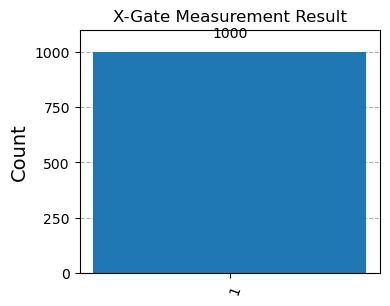

In [42]:
#Now simulate this circuit on AerSimulator()
sim = AerSimulator()
result_x = sim.run(qc_x,shots=1000).result()
fig=plot_histogram(result_x.get_counts(),figsize=(4,3))
plt.title('X-Gate Measurement Result')
plt.show()

### What changed after Applying X ?
**Initial state :**|0>

**After apply X :**|1>

Histogram Show nearly 100% **1** Measurement.

**State Transformation :**
- $$|0> \rightarrow |1>$$
- $$|1> \rightarrow |0>$$
**Exercise** - try flip for state |1> to |0>.also display it using bloch sphere to see the changes as we previously studied.


---


## 3.Pauli Y-Gate


 **Definition:**
the **Y-Gate** flips the qubit but also apply phase.
$$
Y = \begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}
$$
- **Intuition:**
    - Like X ,it flips the state.
    - But Introduced imaginary phase (i) invisible in measurement probability.

- **Expected Result:**
it flip |0> to **i|1>**.


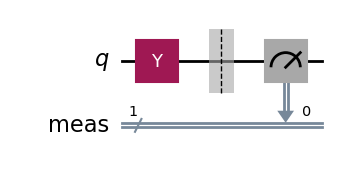

In [3]:
qc_y = QuantumCircuit(1)
qc_y.y(0)
qc_y.measure_all()
qc_y.draw('mpl')

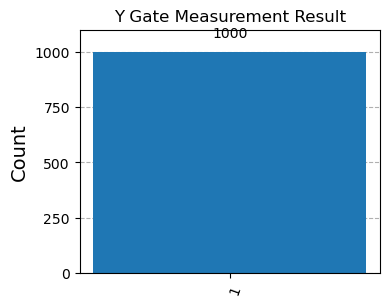

In [37]:
#Now simulate this circuit on AerSimulator()
result_y = sim.run(qc_y,shots=1000).result()
fig=plot_histogram(result_y.get_counts(),figsize=(4,3))
plt.title("Y Gate Measurement Result")
plt.show()

### What changed after Applying Y ?
**Initial state :**|0>

**After apply Y :** i|1>

Measurement Ignores phase ,so we still only see **1** as result.

**State Transformation :**
- $$|0> \rightarrow i|1>$$
- $$|1> \rightarrow -i|0>$$
**Exercise** - try flip for state |1> to -i|0>.also display it using bloch sphere to see the changes as we previously studied.

---



## 3.Pauli Z-Gate


 **Definition:**
the **Z-Gate**  add phase to |1> but leaves |0> unchanged.
$$
Y = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$
- **Intuition:**
    - useful in interference based circuits
    - In computational basis ,measurement outcome remain same.

- **Expected Result:**
it flip |0> to **|0>** i.e no any change in state |0> remain as it is.


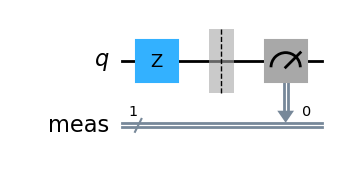

In [4]:
qc_z = QuantumCircuit(1)
qc_z.z(0)
qc_z.measure_all()
qc_z.draw('mpl')

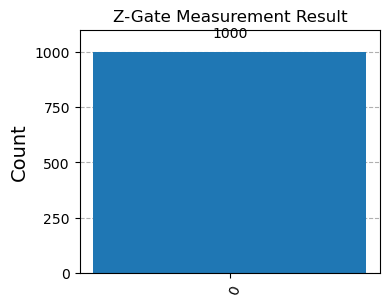

In [38]:
result_z = sim.run(qc_z,shots=1000).result()
fig=plot_histogram(result_z.get_counts(),figsize=(4,3))
plt.title("Z-Gate Measurement Result")
plt.show()

### What changed after Applying Z ?
**Initial state :**|0>

**After apply Z :**|0>

Measurement still only see **0** as result.

**State Transformation :**
- $$|0> \rightarrow |0>$$
- $$|1> \rightarrow -|1>$$
**Exercise** - try flip for state |1> to -|1>.also display it using bloch sphere to see the changes as we previously studied.

---



## 4.H-Gate


 **Definition:**
the **H-Gate**  transform basic state into superposition.
$$
H = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$

- **Intuition:**
    - Create equal probability for |0> and |1>.
    - Fundamental for qunatum Parallelism.

- **Expected Result:**
it flip |0> become superposition to $$\frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)$$



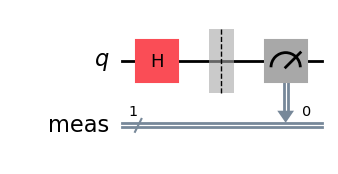

In [5]:
qc_h = QuantumCircuit(1)
qc_h.h(0)
qc_h.measure_all()
qc_h.draw('mpl')

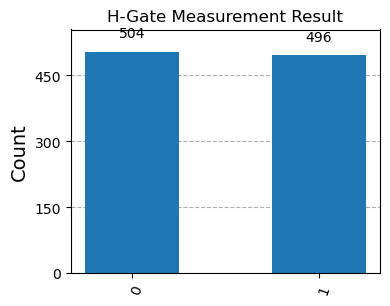

In [39]:
result_h = sim.run(qc_h,shots=1000).result()
fig=plot_histogram(result_h.get_counts(),figsize=(4,3))
plt.title('H-Gate Measurement Result')
plt.show()

### What changed after Applying H ?
**Initial state :**|0>

**After apply Y :** 1/<sqrt>2</sqrt>(|0>+|1>)

Histogran show near 50% of |0> and 50% of |1>.

**State Transformation :**
$$|0> \rightarrow \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)$$
$$|1> \rightarrow \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)$$
**Exercise** - try flip for state |1> to -
$$
\frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)
$$
.also display it using bloch sphere to see the changes as we previously studied.

---



## 5.Custom Quantum Gate((Rotation Around  Y))
We create our own Unitary Gate : **Ry($ \pi $ /3)**
$$
R_y(\theta) = \begin{pmatrix}
\cos\left(\frac{\theta}{2}\right) & -\sin\left(\frac{\theta}{2}\right) \\
\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)
\end{pmatrix}
$$


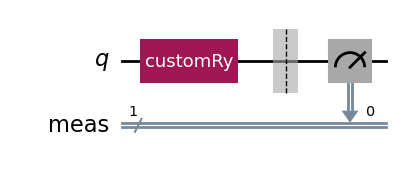

In [6]:
theta = np.pi/3
custom_matrix = np.array([[np.cos(theta/2) , -np.sin(theta/2)],
                         [np.sin(theta/2),  np.cos(theta/2)]])
custom_gate = Operator(custom_matrix)
qc_custom=QuantumCircuit(1)
qc_custom.unitary(custom_gate ,[0], label="customRy")
qc_custom.measure_all()
qc_custom.draw('mpl')

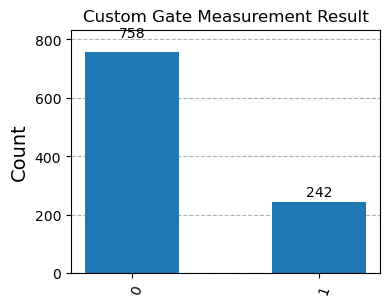

In [41]:
#Now simulate this circuit on AerSimulator()
result_custom = sim.run(qc_custom,shots=1000).result()
fig = plot_histogram(result_custom.get_counts(),figsize=(4,3))
plt.title('Custom Gate Measurement Result')
plt.show()

### What changed after Applying Custom gate  ?
**Initial state :**|0>

**After apply Y :** 
$$
|\psi\rangle = \cos(\pi/6)|0\rangle + \sin(\pi/6)|1\rangle = \frac{\sqrt{3}}{2}|0\rangle + \frac{1}{2}|1\rangle
$$


Histogran show near 75% of |0> and 25% of |1>.

**State Transformation probability :**
- P(0) =0.75  
- P(1) =0.25


So ,today we studied basic quantum gate X,Y,Z,H and making own Custom gate .How represent it by using simulator.
for detailed understanding of each concepts refer personolized notes **day5_notes.md**.

---

**Author:** *Shreya Palase*  

**Date Created:**  *28-Nov-2025*

**project:** Quantum-Computing-coding

**File:** day5_QuantumGate.ipynb

Thank you and Keep Learning!

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>